<a href="https://colab.research.google.com/github/Kalazclint/Retail_store-Project/blob/main/Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [ ]:
order_products_prior = "/content/drive/My Drive/Market_Basket_Analysis/order_products__prior.csv"
order_products_prior = pd.read_csv(order_products_prior)
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products_prior.shape

(32434489, 4)

In [ ]:
dept = "/content/drive/My Drive/Market_Basket_Analysis/departments.csv"
dept = pd.read_csv(dept)
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
dept['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [ ]:
orders = "/content/drive/My Drive/Market_Basket_Analysis/orders.csv"
orders = pd.read_csv(orders)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [ ]:
order_products_train= "/content/drive/My Drive/Market_Basket_Analysis/order_products__train.csv"
order_products_train = pd.read_csv(order_products_train)
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
products = "/content/drive/My Drive/Market_Basket_Analysis/products.csv"
products = pd.read_csv(products)
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:

data = order_products_train.merge(products, on=['product_id'])
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [ ]:
data = data.merge(dept, on =['department_id'])

In [ ]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs


In [ ]:
data.shape

(1384617, 8)

In [ ]:
data = data.merge(aisles, on =['aisle_id'])
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,dairy eggs,yogurt


In [ ]:
data = data.drop(['aisle_id', 'department_id'], axis=1)
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,dairy eggs,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,dairy eggs,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,dairy eggs,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,dairy eggs,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,dairy eggs,yogurt


In [ ]:
#Checking for Sales by product
product_order = data.groupby('product_name')['order_id'].count().reset_index().sort_values(by= 'order_id', ascending = False)
product_order = product_order.rename(columns={'order_id': 'count'})
most_order_prodcuts = product_order.head(20)
most_order_prodcuts

,product_name,count
2814,Banana,18726
2641,Bag of Organic Bananas,15480
25128,Organic Strawberries,10894
22496,Organic Baby Spinach,9784
17475,Large Lemon,8135
22465,Organic Avocado,7409
23736,Organic Hass Avocado,7293
33836,Strawberries,6494
18278,Limes,6033
24656,Organic Raspberries,5546


Text(0.5, 1.0, 'Most Sold Products')

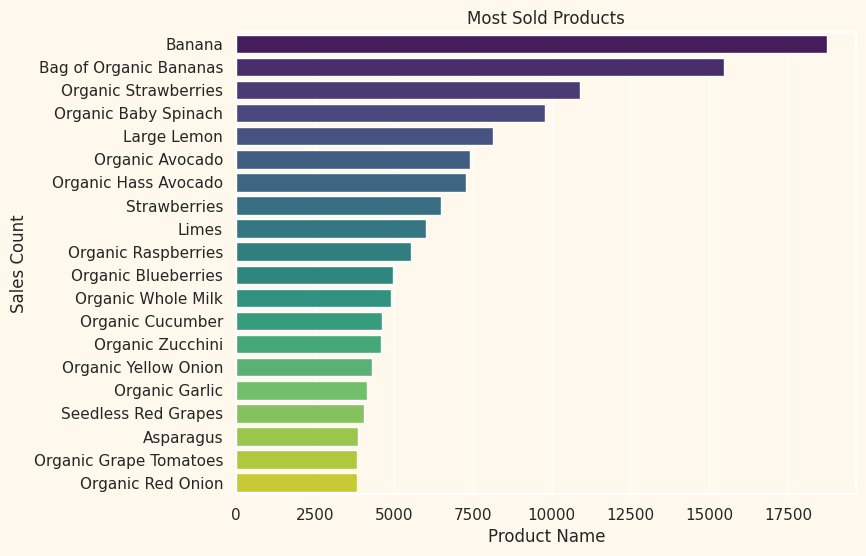

In [ ]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
plt.figure(figsize=(8,6))
sns.barplot(y = most_order_prodcuts['product_name'], x = most_order_prodcuts['count'], orient = 'h',palette='viridis')

plt.xlabel('Product Name')
plt.ylabel("Sales Count")
plt.title("Most Sold Products")

In [ ]:
#Checking for Sales by Department
dept_order = data.groupby('department')['order_id'].count().reset_index().sort_values(by= 'order_id', ascending = False)
dept_order = dept_order.rename(columns={'order_id': 'count'})
dept_order

,department,count
19,produce,409087
7,dairy eggs,217051
20,snacks,118862
3,beverages,114046
10,frozen,100426
16,pantry,81242
2,bakery,48394
6,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


Text(0.5, 1.0, 'Sales by Department')

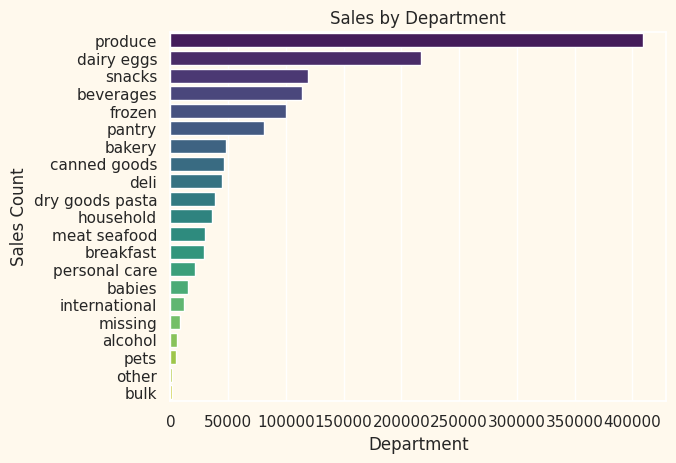

In [ ]:
sns.barplot(y = dept_order['department'], x = dept_order['count'], orient = 'h',palette='viridis')

plt.xlabel('Department')
plt.ylabel("Sales Count")
plt.title("Sales by Department")

In [ ]:
#Checking Re-ordered products
re_ordered = data[data['reordered']==1]
re_ordered

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,dairy eggs,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,dairy eggs,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,dairy eggs,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,dairy eggs,yogurt
5,2445303,49302,2,1,Bulgarian Yogurt,dairy eggs,yogurt
...,...,...,...,...,...,...,...
1384606,2855590,12632,5,1,Classic Pate Country Style Dinner Cat Food,pets,cat food care
1384607,2873160,12751,3,1,Whiskas® Temptations® SUPER Mega Bag Chicken,pets,cat food care
1384608,3011740,34967,14,1,Healthy Naturals With Wholesome Chicken Adult ...,pets,cat food care
1384612,3283540,39484,23,1,Sliced Turkey Feast in Gravy Cat Food,pets,cat food care


In [ ]:
dept_reorder = re_ordered.groupby('department')['order_id'].count().reset_index().sort_values(by= 'order_id', ascending = False)
dept_reorder = dept_reorder.rename(columns={'order_id': 'count'})
dept_reorder

,department,count
19,produce,271886
7,dairy eggs,146502
3,beverages,75060
20,snacks,69102
10,frozen,56168
2,bakery,30692
16,pantry,29498
8,deli,27367
6,canned goods,22782
9,dry goods pasta,18885


In [ ]:
product_reordered = re_ordered.groupby('product_name')['order_id'].count().reset_index().sort_values(by= 'order_id', ascending = False)
product_reordered = product_reordered.rename(columns={'order_id': 'count'})
most_reordered_products = product_reordered.head(20)
most_reordered_products

,product_name,count
2083,Banana,16557
1955,Bag of Organic Bananas,13362
19326,Organic Strawberries,8603
17129,Organic Baby Spinach,8055
17102,Organic Avocado,6226
18149,Organic Hass Avocado,6042
13315,Large Lemon,5923
26091,Strawberries,4786
18922,Organic Raspberries,4279
13919,Limes,4234


In [ ]:
data.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
department           0
aisle                0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,1,49302,1,1,Bulgarian Yogurt,dairy eggs,yogurt
1,816049,49302,7,1,Bulgarian Yogurt,dairy eggs,yogurt
2,1242203,49302,1,1,Bulgarian Yogurt,dairy eggs,yogurt
3,1383349,49302,11,1,Bulgarian Yogurt,dairy eggs,yogurt
4,1787378,49302,8,0,Bulgarian Yogurt,dairy eggs,yogurt


**Performing Associative Mining (Basket Analysis)**

In [ ]:
cust_level = data[["order_id", "product_name"]].sort_values(by = "order_id")
cust_level['product_name'] = cust_level['product_name'].str.strip()
cust_level

,order_id,product_name
0,1,Bulgarian Yogurt
626138,1,Lightly Smoked Sardines in Olive Oil
217051,1,Organic Celery Hearts
68060,1,Organic Whole String Cheese
383140,1,Organic Hass Avocado
...,...,...
116277,3421063,Organic Half & Half
696609,3421063,Natural Artesian Water
984716,3421070,Creamy Peanut Butter
149767,3421070,Organic Unsweetened Almond Milk


In [ ]:
transactions = [a[1]['product_name'].tolist() for a in list(cust_level.groupby(['order_id']))]

<ipython-input-16-2673ca938892>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['product_name'].tolist() for a in list(cust_level.groupby(['order_id']))]


In [ ]:
transactions

[['Bulgarian Yogurt',
  'Lightly Smoked Sardines in Olive Oil',
  'Organic Celery Hearts',
  'Organic Whole String Cheese',
  'Organic Hass Avocado',
  'Bag of Organic Bananas',
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Cucumber Kirby'],
 ['Asparagus',
  'Grated Pecorino Romano Cheese',
  'Super Greens Salad',
  'Organic Half & Half',
  'Cage Free Extra Large Grade AA Eggs',
  'Spring Water',
  'Prosciutto, Americano',
  'Organic Garnet Sweet Potato (Yam)'],
 ['Shelled Pistachios',
  'Organic Biologique Limes',
  'Green Peas',
  'Fresh Dill',
  'Organic Hot House Tomato',
  'Flat Parsley, Bunch',
  'Organic Baby Arugula',
  'Bunched Cilantro',
  'Organic Raw Unfiltered Apple Cider Vinegar'],
 ['Roasted Turkey',
  'Organic Cucumber',
  'Organic Grape Tomatoes',
  'Organic Blueberries',
  'Organic Raspberries',
  'Organic Pomegranate Kernels',
  'Organic Whole Strawberries'],
 ['Organic Raw Kombucha Gingerade',
  'Organic Zucchini',
  'Organic Orange Juice With Calcium & Vita

In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=cb00715696bf729abc8ae1b6b46236976bb3d4f1923a1a7ce531bfbabf736037
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002,min_confidence = 0.05, min_lift =3, min_length = 2)

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'Organic Hass Avocado', 'Apple Honeycrisp Organic'}), support=0.0030561927916530115, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Apple Honeycrisp Organic'}), items_add=frozenset({'Organic Hass Avocado'}), confidence=0.1780639431616341, lift=3.2035639542430894), OrderedStatistic(items_base=frozenset({'Organic Hass Avocado'}), items_add=frozenset({'Apple Honeycrisp Organic'}), confidence=0.05498423145481969, lift=3.203563954243089)]),
 RelationRecord(items=frozenset({'Apple Honeycrisp Organic', 'Organic Raspberries'}), support=0.0024769642326364807, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Apple Honeycrisp Organic'}), items_add=frozenset({'Organic Raspberries'}), confidence=0.14431616341030196, lift=3.414276863487614), OrderedStatistic(items_base=frozenset({'Organic Raspberries'}), items_add=frozenset({'Apple Honeycrisp Organic'}), confidence=0.05860079336458709, lift=3.414276863487614)]),
 RelationRecord(items=frozenset

In [ ]:
def inspect(results):
  lhs = [tuple(result[2][0][0])[0] for result in results]
  rhs = [tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list(zip(lhs,rhs,supports,confidences,lifts))


In [ ]:
resultsindataframe = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side','Support','Confidences','Lifts'])
resultsindataframe.sort_values(by = "Lifts", ascending = False).head(50)

,Left Hand Side,Right Hand Side,Support,Confidences,Lifts
55,Orange Bell Pepper,Yellow Bell Pepper,0.003018,0.212446,23.906409
65,Organic Bell Pepper,Organic Red Bell Pepper,0.002134,0.296925,16.280482
40,Lime Sparkling Water,Sparkling Lemon Water,0.002500,0.166836,15.383284
7,Blackberries,Raspberries,0.002248,0.273909,10.960453
41,Lime Sparkling Water,Sparkling Water Grapefruit,0.003849,0.256867,10.033709
12,Bunched Cilantro,Jalapeno Peppers,0.002104,0.143750,9.932224
156,Sparkling Lemon Water,Sparkling Water Grapefruit,0.002507,0.231202,9.031183
31,Green Bell Pepper,Red Peppers,0.003681,0.191591,8.653500
166,Organic Garlic,Bag of Organic Bananas,0.002043,0.064454,8.456953
54,Orange Bell Pepper,Red Peppers,0.002561,0.180258,8.141621


In [ ]:
resultsindataframe[resultsindataframe['Confidences'] > 0.25]

,Left Hand Side,Right Hand Side,Support,Confidences,Lifts
5,Organic Large Green Asparagus,Bag of Organic Bananas,0.002004,0.360274,3.053694
6,Organic Navel Orange,Bag of Organic Bananas,0.005526,0.366162,3.103598
7,Blackberries,Raspberries,0.002248,0.273909,10.960453
8,Blackberries,Strawberries,0.002195,0.267409,5.402915
14,Bunched Cilantro,Limes,0.004253,0.290625,6.320672
15,Cantaloupe,Organic Strawberries,0.002515,0.271605,3.271251
34,Jalapeno Peppers,Limes,0.004169,0.288046,6.264590
41,Lime Sparkling Water,Sparkling Water Grapefruit,0.003849,0.256867,10.033709
64,Organic Bartlett Pear,Organic Strawberries,0.002058,0.275510,3.318287
65,Organic Bell Pepper,Organic Red Bell Pepper,0.002134,0.296925,16.280482
